In [1]:
from nsimpkg.random_variables import BetaRV, LogitNormalRV
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from tqdm import tqdm
from nsimpkg.mcsim import rho
from nsimpkg.plotting import plot_iters_beta, plot_params_beta, plot_mse
from nsimpkg.beta_OAIS import SG_OAIS_beta
np.random.seed(0)

plt.rcParams["figure.dpi"] = 300

In [2]:
def phi(x):
    return (np.abs(x-0.5)<0.25).astype(float)

pi = LogitNormalRV(0, 1)
q0 = BetaRV(1, 1)

In [3]:
import nsimpkg.mcsim
# import reload function from importlib
from importlib import reload
reload(nsimpkg.mcsim)
from nsimpkg.mcsim import mcsim
GT = mcsim(phi, pi, N=int(1e8))
GT

0.72815795

In [8]:
N = 1000
Niter = 5*int(1e4)
alpha = 10
nexperiments = 100
experiment_distributions = []
experiment_results = []
for experiment in range(nexperiments):
    results, distributions = SG_OAIS_beta(phi, pi, q0, N, Niter, alpha=1e-1)
    experiment_distributions.append(distributions)
    experiment_results.append(results)

100%|██████████| 50000/50000 [00:40<00:00, 1234.12it/s]


/Users/carlosperello/Desktop/M3R/nsimpkg/plotting.py:220: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  axs[0].legend(handles, labels)


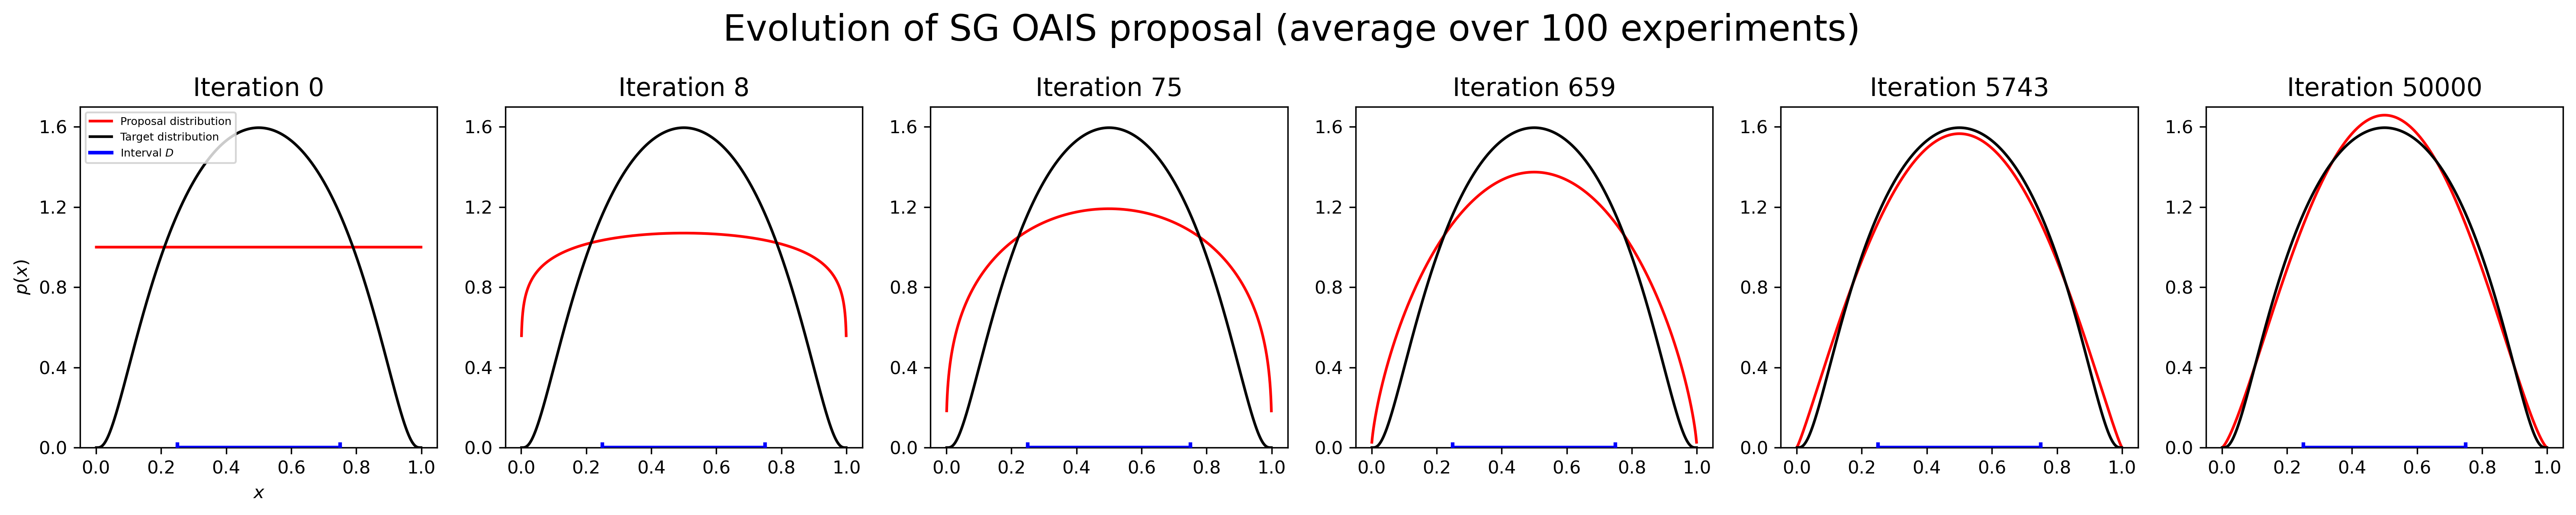

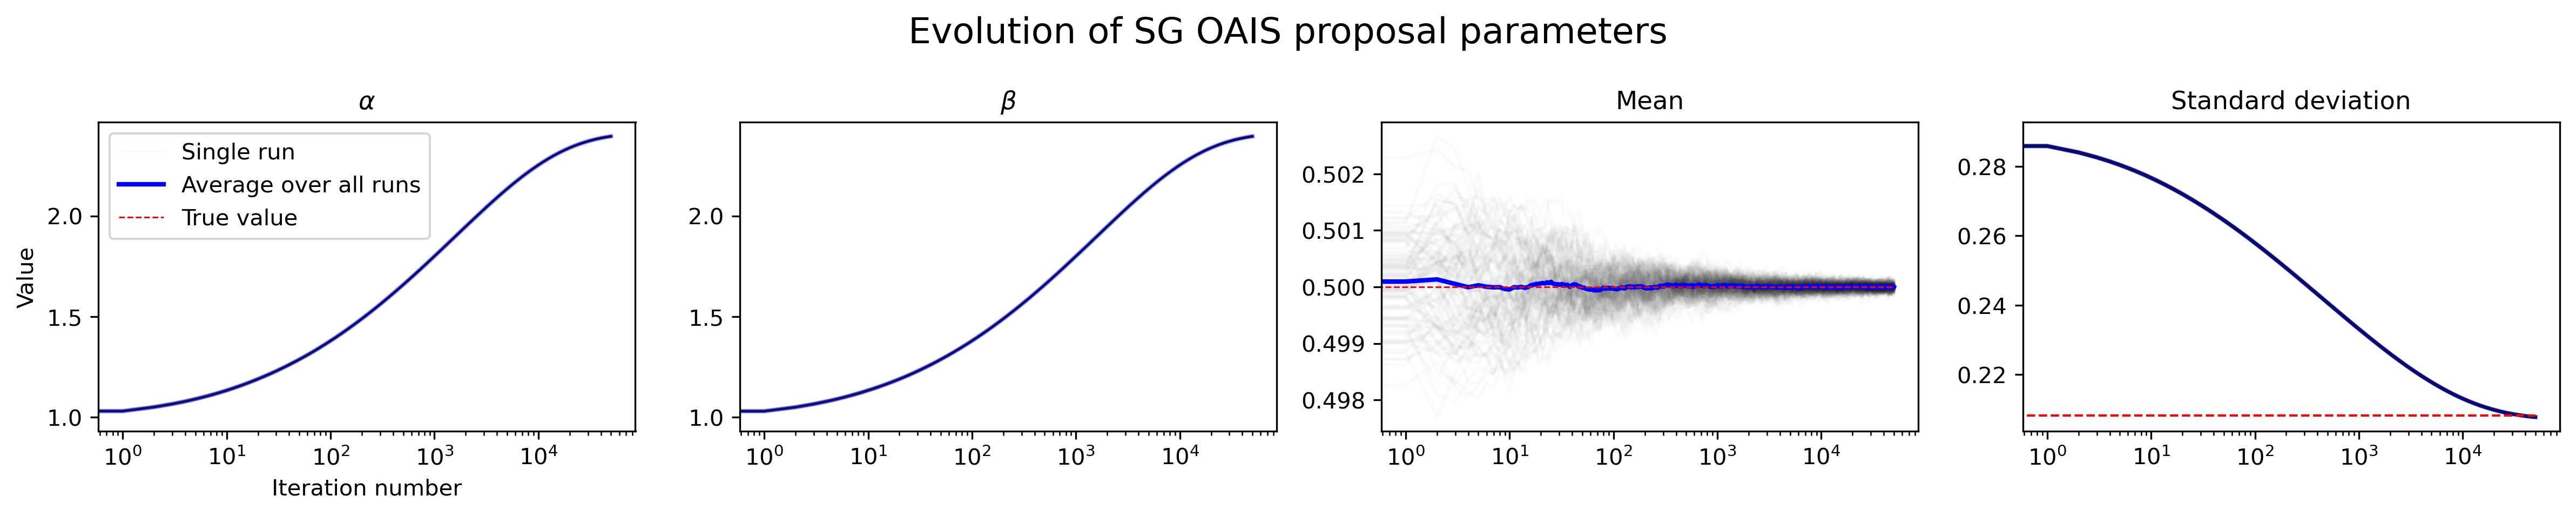

In [19]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plot_iters_beta, plot_params_beta, plot_mse
optimiser = "SGD"
plot_iters_beta(experiment_distributions, pi, f"Evolution of {optimiser if optimiser != 'SGD' else 'SG'} OAIS proposal (average over {nexperiments} experiments)")
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/beta/{optimiser}/distribution_iterations.png")
plot_params_beta(experiment_distributions, pi, f"Evolution of {optimiser if optimiser != 'SGD' else 'SG'} OAIS proposal parameters", Nsamples=int(1e8), alpha=0.02, xlog=True)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/beta/{optimiser}/parameters.png")

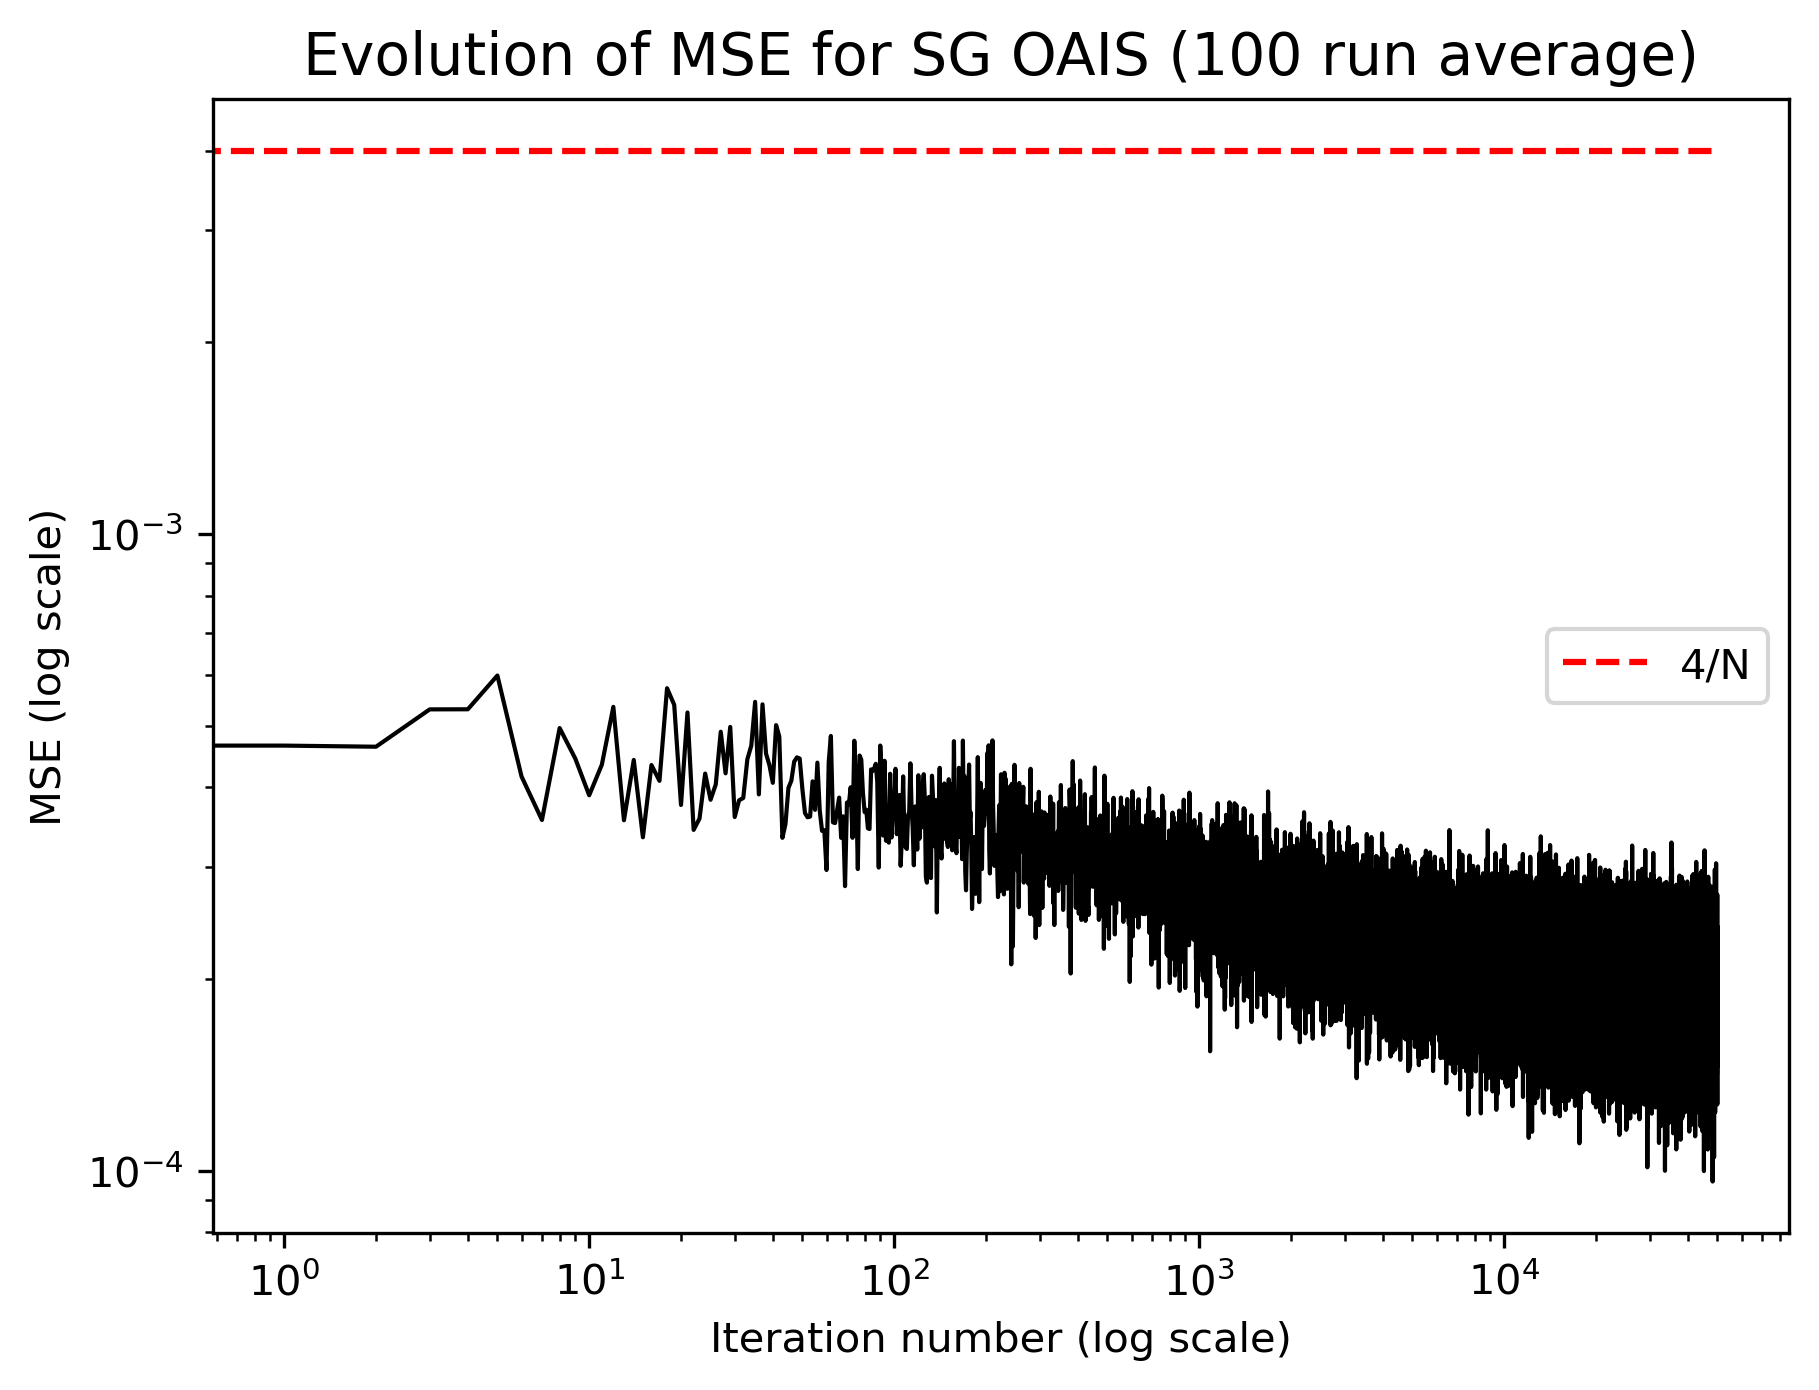

In [20]:
import nsimpkg.mcsim
# import reload function from importlib
from importlib import reload
reload(nsimpkg.mcsim)
from nsimpkg.mcsim import mcsim
GT = mcsim(phi, pi, N=int(1e8))
title_mse = f"Evolution of MSE for {optimiser if optimiser != 'SGD' else 'SG'} OAIS ({nexperiments} run average)"
plot_mse(experiment_results, GT, title=title_mse, xlog=True, ylog=True)
plt.hlines(4/N, 0, Niter, colors='r', linestyles='dashed', label="4/N")
plt.title(title_mse, fontsize=14)
plt.legend(loc='center right')
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/beta/{optimiser}/mse.png")
plt.show()